In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from os import walk
import os
import math

pd.set_option('display.max_columns', None)

In [2]:
train_data = pd.read_csv("../Data/train_FD001.txt", sep = "\s+", header = None)
train_data.shape

(20631, 26)

In [3]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
## Read and Load Data
file_names = []
for (dirpath, dirnames, filenames) in walk("Data/"):
    file_names.extend(filenames)

file_names

[]

In [5]:
def read_data(file_name):
    data = pd.read_csv(os.path.join("../Data/", file_name+".txt"), sep = "\s+", header = None)
    col_names = ["unit_number", "time"]
    col_names += [f"operation{i}" for i in range(1, 4)]
    col_names += [f"sensor{i}" for i in range(1, 22)]
    data.columns=col_names

    return data


In [6]:
# Training set
train_FD001 = read_data("train_FD001")
train_FD002 = read_data("train_FD002")
train_FD003 = read_data("train_FD003")
train_FD004 = read_data("train_FD004")

# Test set
test_FD001 = read_data("test_FD001")
test_FD002 = read_data("test_FD002")
test_FD003 = read_data("test_FD003")
test_FD004 = read_data("test_FD004")

In [7]:
# Number of engines
print("Number of engines in train_FD001", len(train_FD001["unit_number"].unique().tolist()))
print("Number of engines in test_FD001", len(test_FD001["unit_number"].unique().tolist()))

print("Number of engines in train_FD002", len(train_FD002["unit_number"].unique().tolist()))
print("Number of engines in test_FD002", len(test_FD002["unit_number"].unique().tolist()))

print("Number of engines in train_FD003", len(train_FD003["unit_number"].unique().tolist()))
print("Number of engines in test_FD003", len(test_FD003["unit_number"].unique().tolist()))

print("Number of engines in train_FD004", len(train_FD004["unit_number"].unique().tolist()))
print("Number of engines in test_FD004", len(test_FD004["unit_number"].unique().tolist()))

Number of engines in train_FD001 100
Number of engines in test_FD001 100
Number of engines in train_FD002 260
Number of engines in test_FD002 259
Number of engines in train_FD003 100
Number of engines in test_FD003 100
Number of engines in train_FD004 249
Number of engines in test_FD004 248


In [8]:
train_FD001.groupby("unit_number")["time"].count().values

array([192, 287, 179, 189, 269, 188, 259, 150, 201, 222, 240, 170, 163,
       180, 207, 209, 276, 195, 158, 234, 195, 202, 168, 147, 230, 199,
       156, 165, 163, 194, 234, 191, 200, 195, 181, 158, 170, 194, 128,
       188, 216, 196, 207, 192, 158, 256, 214, 231, 215, 198, 213, 213,
       195, 257, 193, 275, 137, 147, 231, 172, 185, 180, 174, 283, 153,
       202, 313, 199, 362, 137, 208, 213, 213, 166, 229, 210, 154, 231,
       199, 185, 240, 214, 293, 267, 188, 278, 178, 213, 217, 154, 135,
       341, 155, 258, 283, 336, 202, 156, 185, 200], dtype=int64)

128 362 206.31


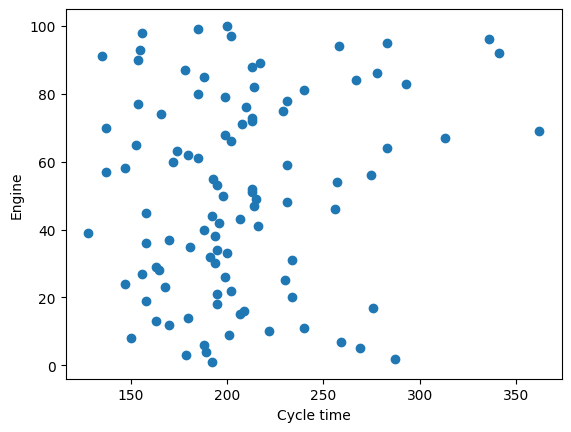

In [9]:
x = train_FD001.groupby("unit_number")["time"].count().values
y = train_FD001["unit_number"].unique().tolist()
plt.scatter(x,y)
plt.xlabel("Cycle time")
plt.ylabel("Engine")
print(x.min(), x.max(), x.mean())

[Text(0, 0, '6'),
 Text(0, 0, '14'),
 Text(0, 0, '13'),
 Text(0, 0, '25'),
 Text(0, 0, '16'),
 Text(0, 0, '9'),
 Text(0, 0, '4'),
 Text(0, 0, '7'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

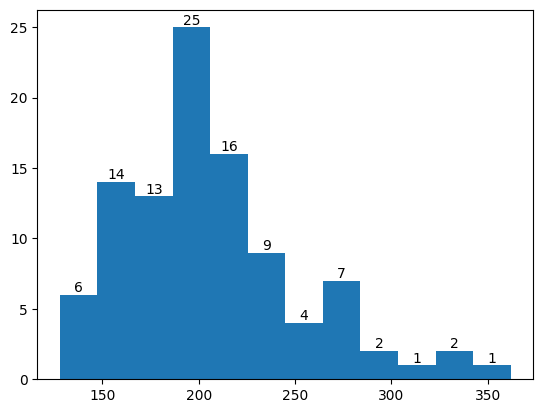

In [10]:
counts, edges, bars = plt.hist(x, bins=12)
plt.bar_label(bars)

31 303 130.96


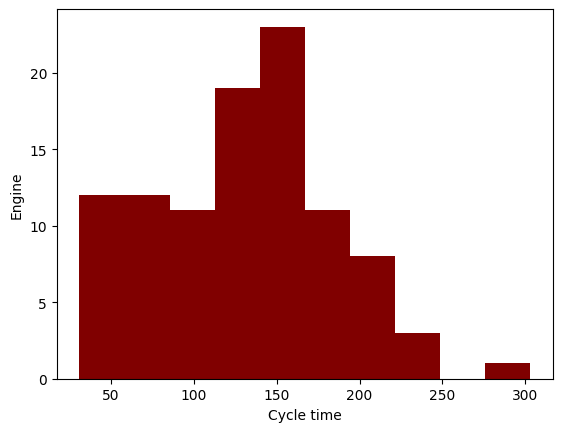

In [11]:
x = test_FD001.groupby("unit_number")["time"].count().values
y = test_FD001["unit_number"].unique().tolist()
plt.hist(x, color="maroon")
plt.xlabel("Cycle time")
plt.ylabel("Engine")
print(x.min(), x.max(), x.mean())

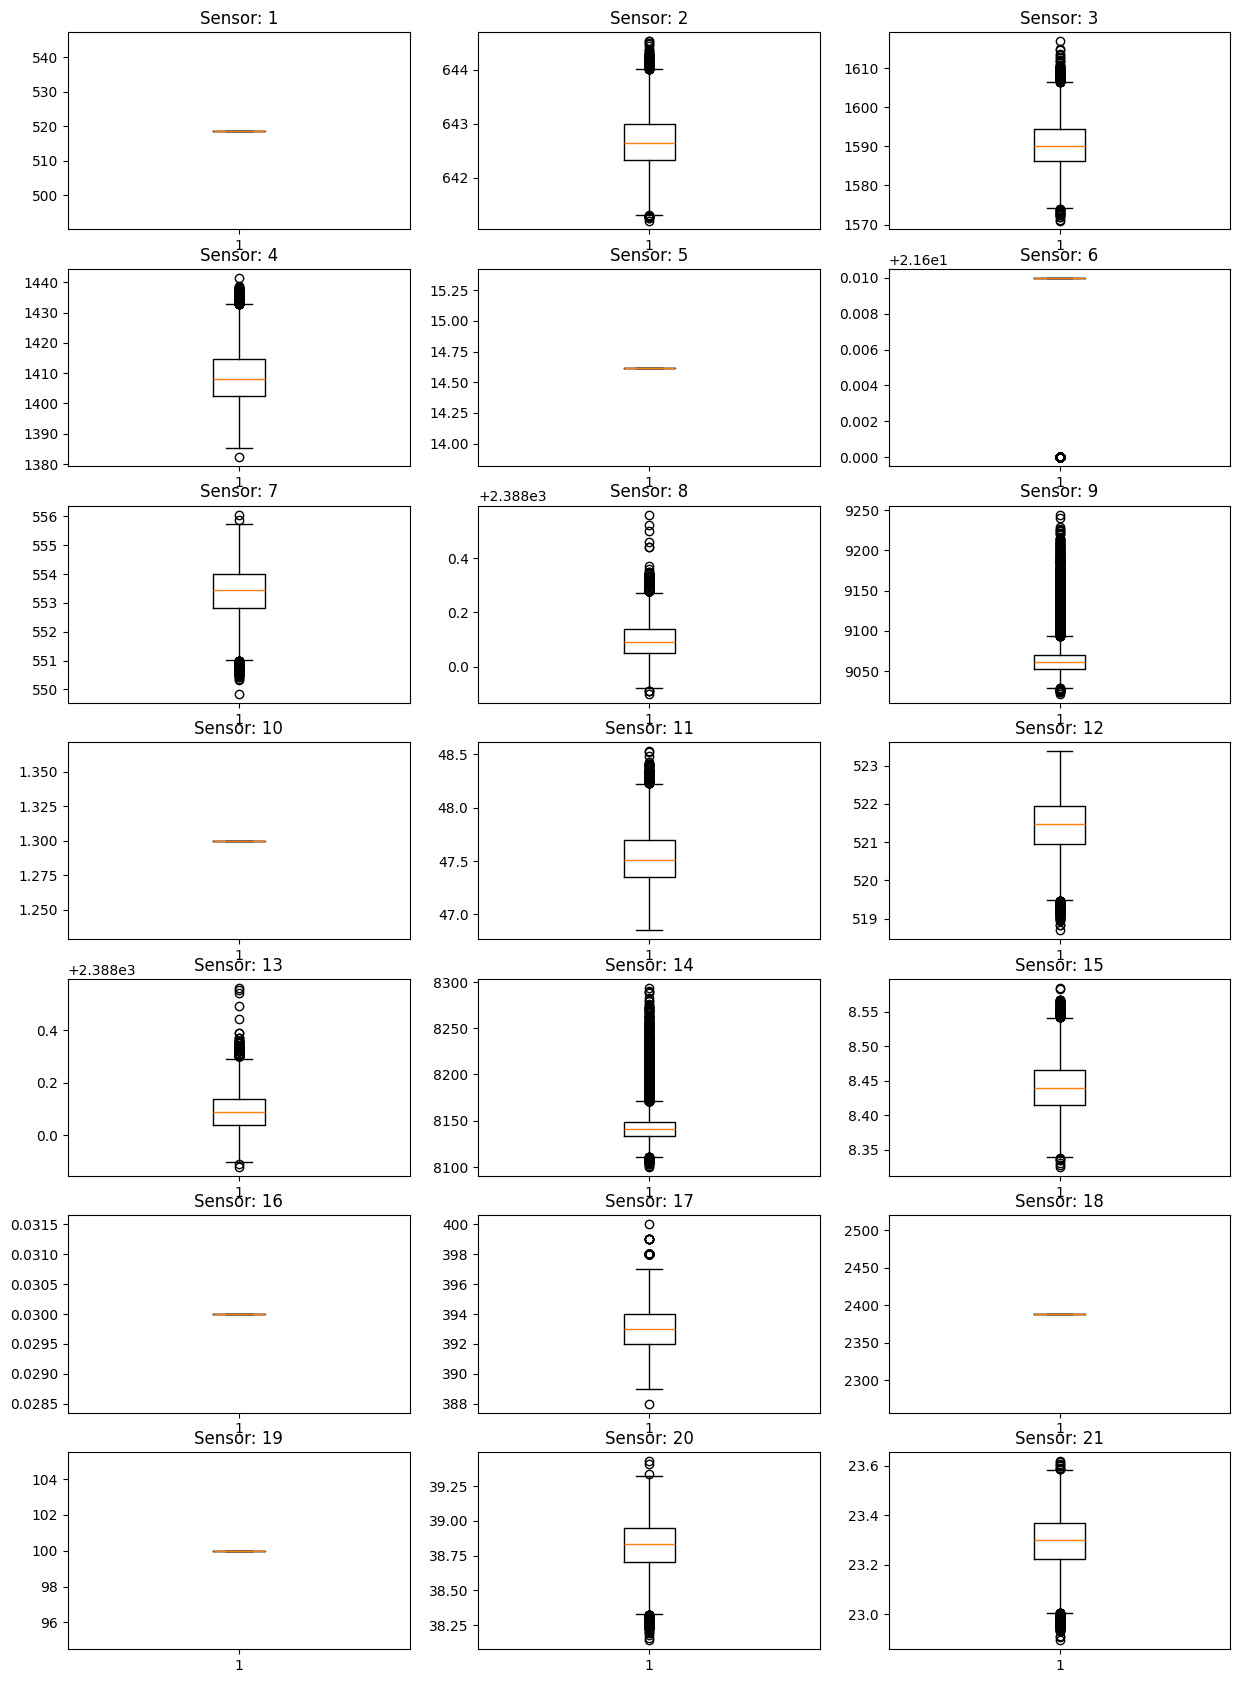

In [12]:
plt.figure(figsize = (15, 21))
for i in np.arange(5, 26):
    temp = train_data.iloc[:, i]
    plt.subplot(7,3, i-4)
    plt.boxplot(temp)
    plt.title("Sensor: "+ str(i-4))
plt.show()

In [13]:
train_FD001.isnull().mean()

unit_number    0.0
time           0.0
operation1     0.0
operation2     0.0
operation3     0.0
sensor1        0.0
sensor2        0.0
sensor3        0.0
sensor4        0.0
sensor5        0.0
sensor6        0.0
sensor7        0.0
sensor8        0.0
sensor9        0.0
sensor10       0.0
sensor11       0.0
sensor12       0.0
sensor13       0.0
sensor14       0.0
sensor15       0.0
sensor16       0.0
sensor17       0.0
sensor18       0.0
sensor19       0.0
sensor20       0.0
sensor21       0.0
dtype: float64

In [14]:
train_FD001.isna().mean()

unit_number    0.0
time           0.0
operation1     0.0
operation2     0.0
operation3     0.0
sensor1        0.0
sensor2        0.0
sensor3        0.0
sensor4        0.0
sensor5        0.0
sensor6        0.0
sensor7        0.0
sensor8        0.0
sensor9        0.0
sensor10       0.0
sensor11       0.0
sensor12       0.0
sensor13       0.0
sensor14       0.0
sensor15       0.0
sensor16       0.0
sensor17       0.0
sensor18       0.0
sensor19       0.0
sensor20       0.0
sensor21       0.0
dtype: float64

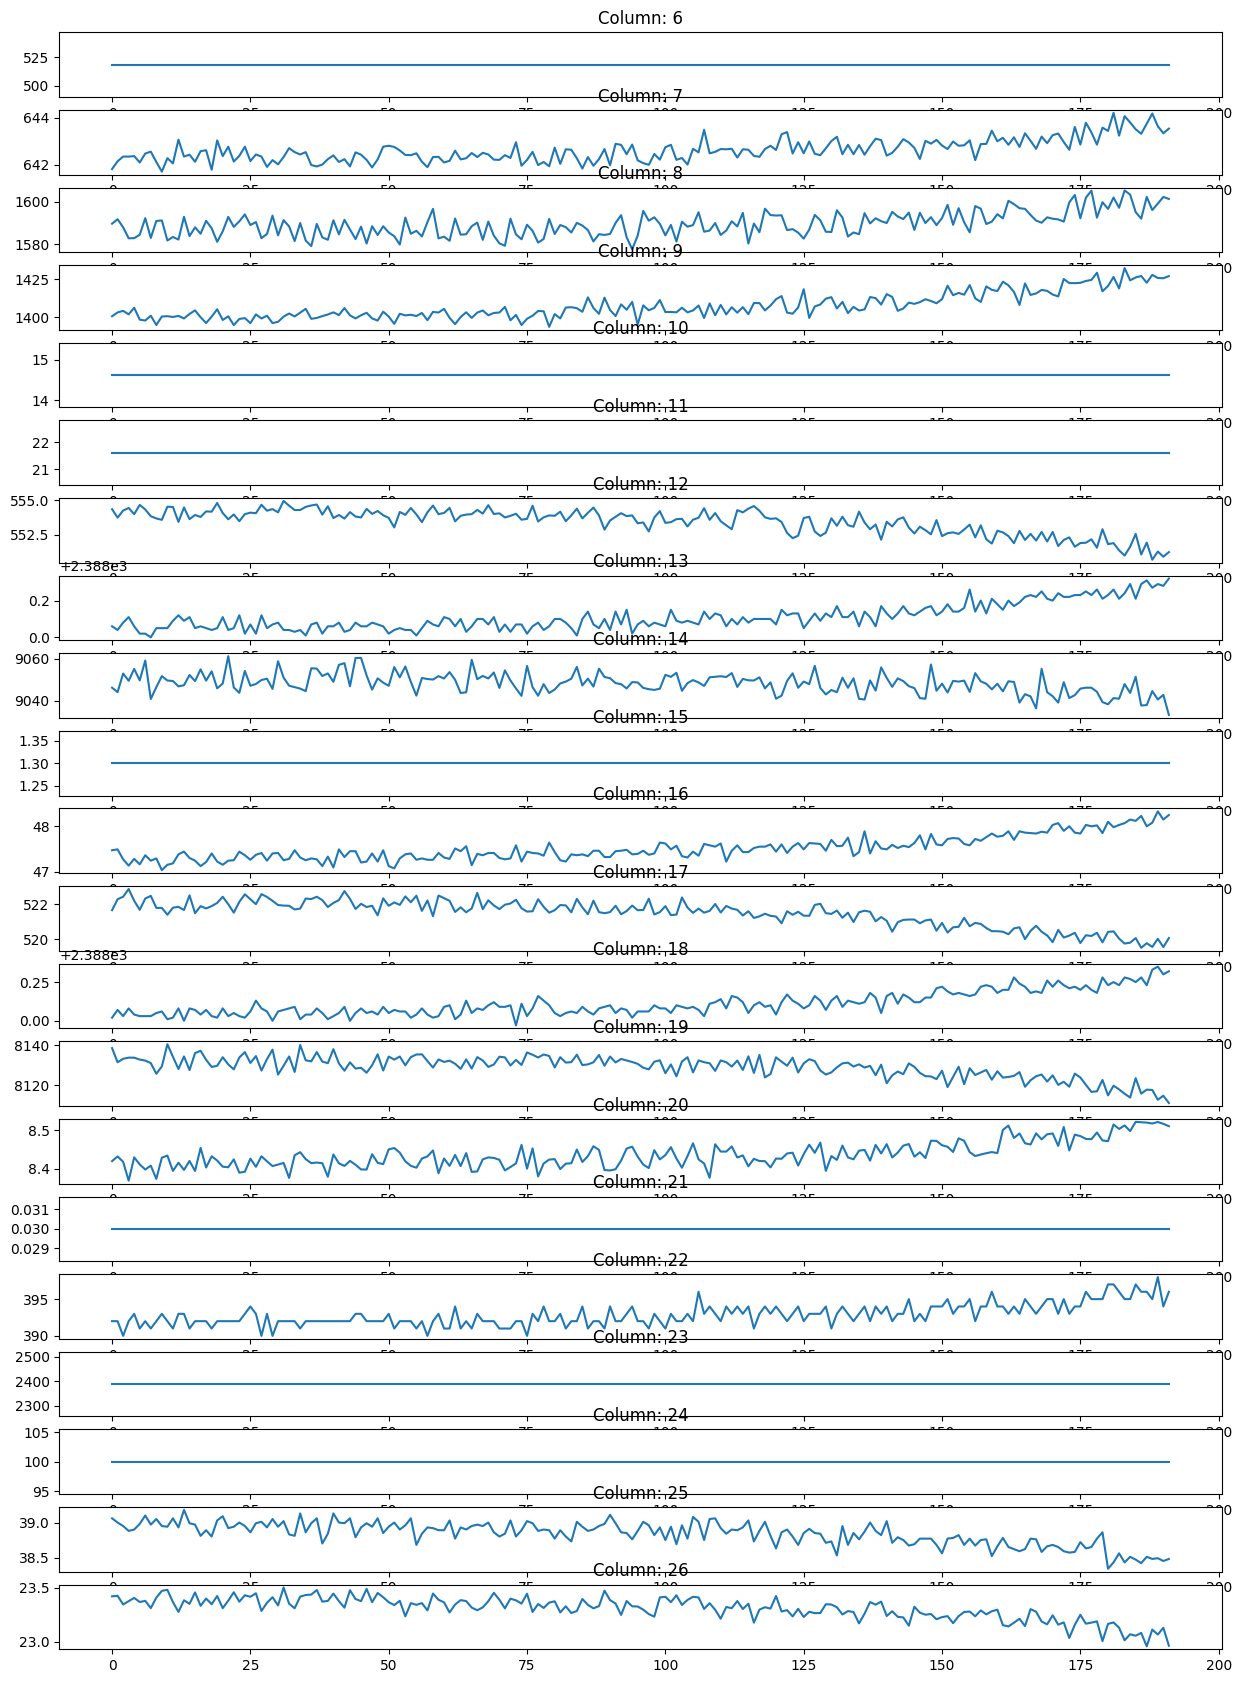

In [26]:
# Visulaization of sensor data of one engine from the training dataset
plt.figure(figsize = (15, 21))
for i in np.arange(5,26):
    temp1 = train_FD001[train_FD001["unit_number"]==1].iloc[:, i]
    plt.subplot(21,1, i-4)
    plt.plot(temp1)
    plt.title("Column: "+ str(i+1))
plt.show()

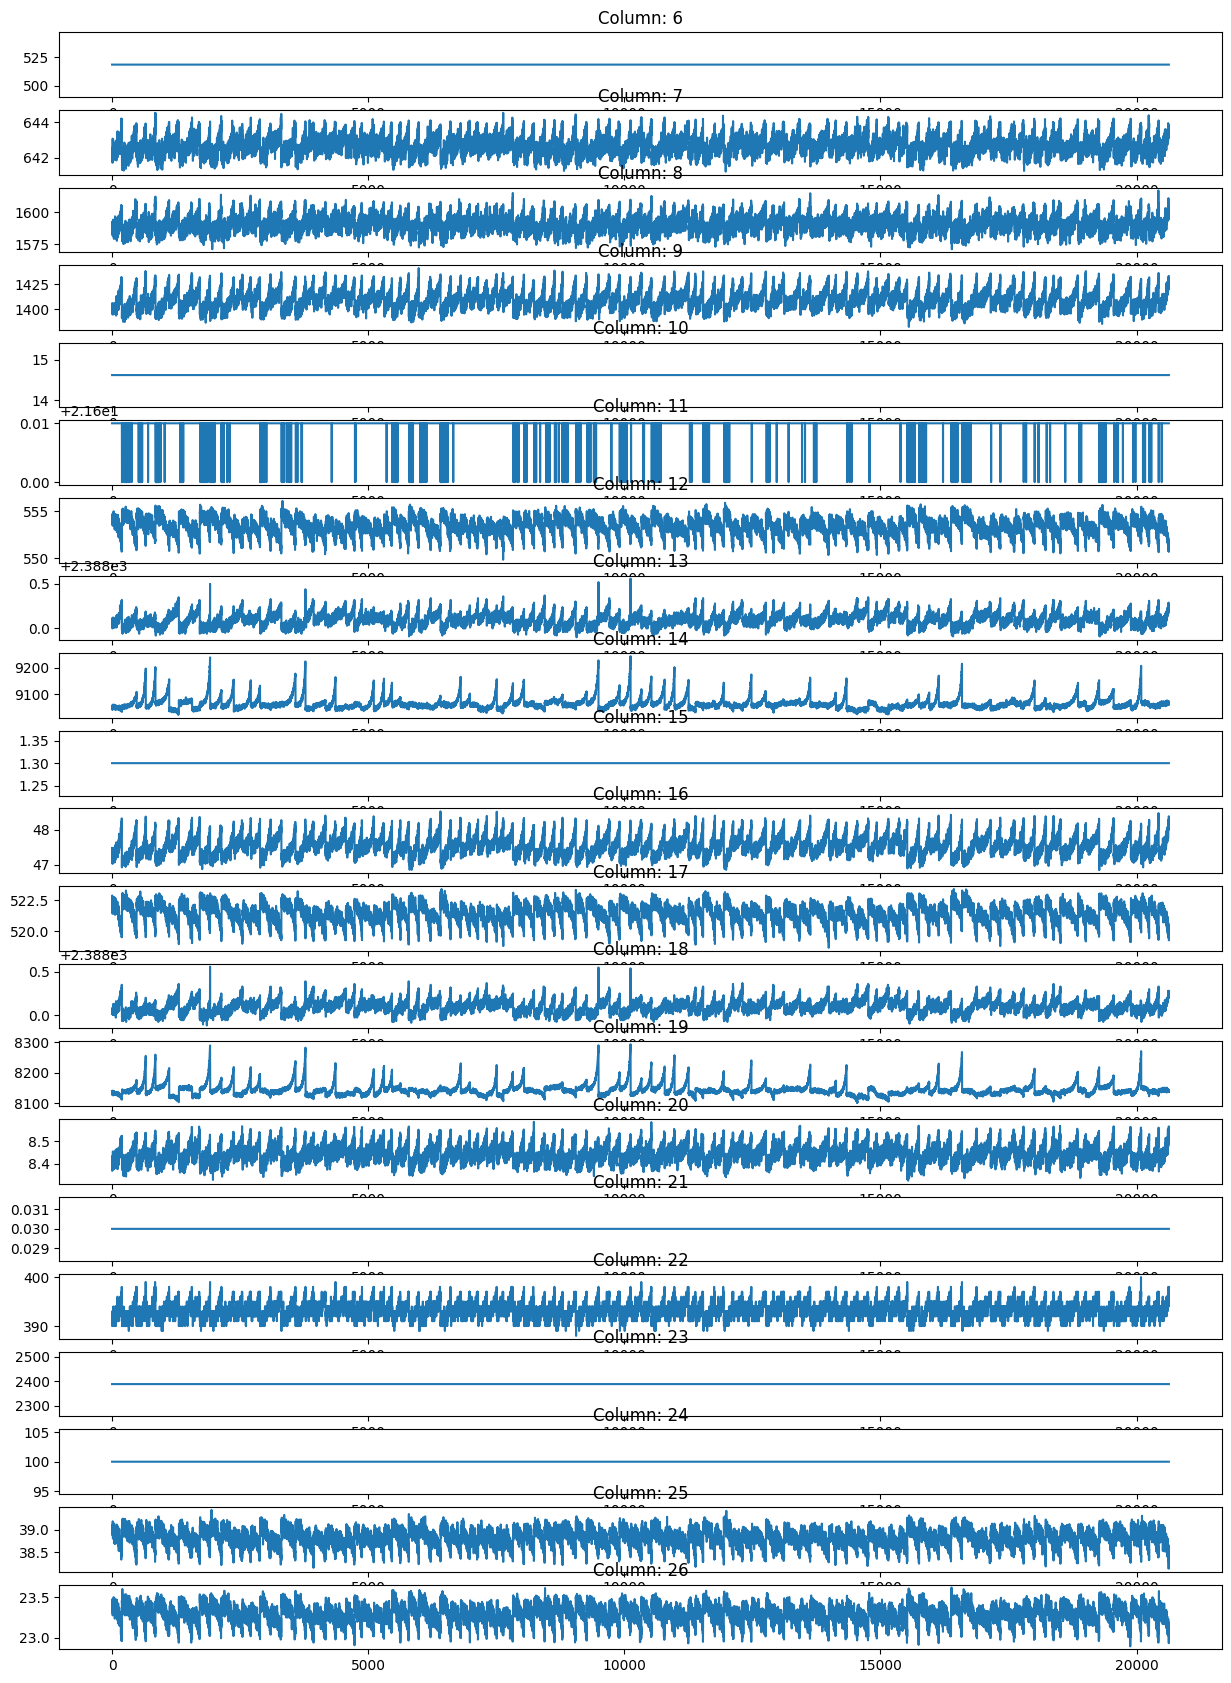

In [24]:
# Visulaization of sensor data of the training dataset
plt.figure(figsize = (15, 21))
for i in np.arange(5,26):
    temp1 = train_FD001.iloc[:, i]
    plt.subplot(21,1, i-4)
    plt.plot(temp1)
    plt.title("Column: "+ str(i+1))
plt.show()

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. 

C:\Users\pault\AppData\Local\Temp\ipykernel_27948\3999699196.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(temp1)
C:\Users\pault\AppData\Local\Temp\ipykernel_27948\3999699196.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(temp1)
C:\Users\pault\AppData\Local\Temp\ipykernel_27948\3999699196.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(temp1)
C:\Users\pault\AppData\Local\Temp\ipykernel_27948\3999699196.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(temp1)


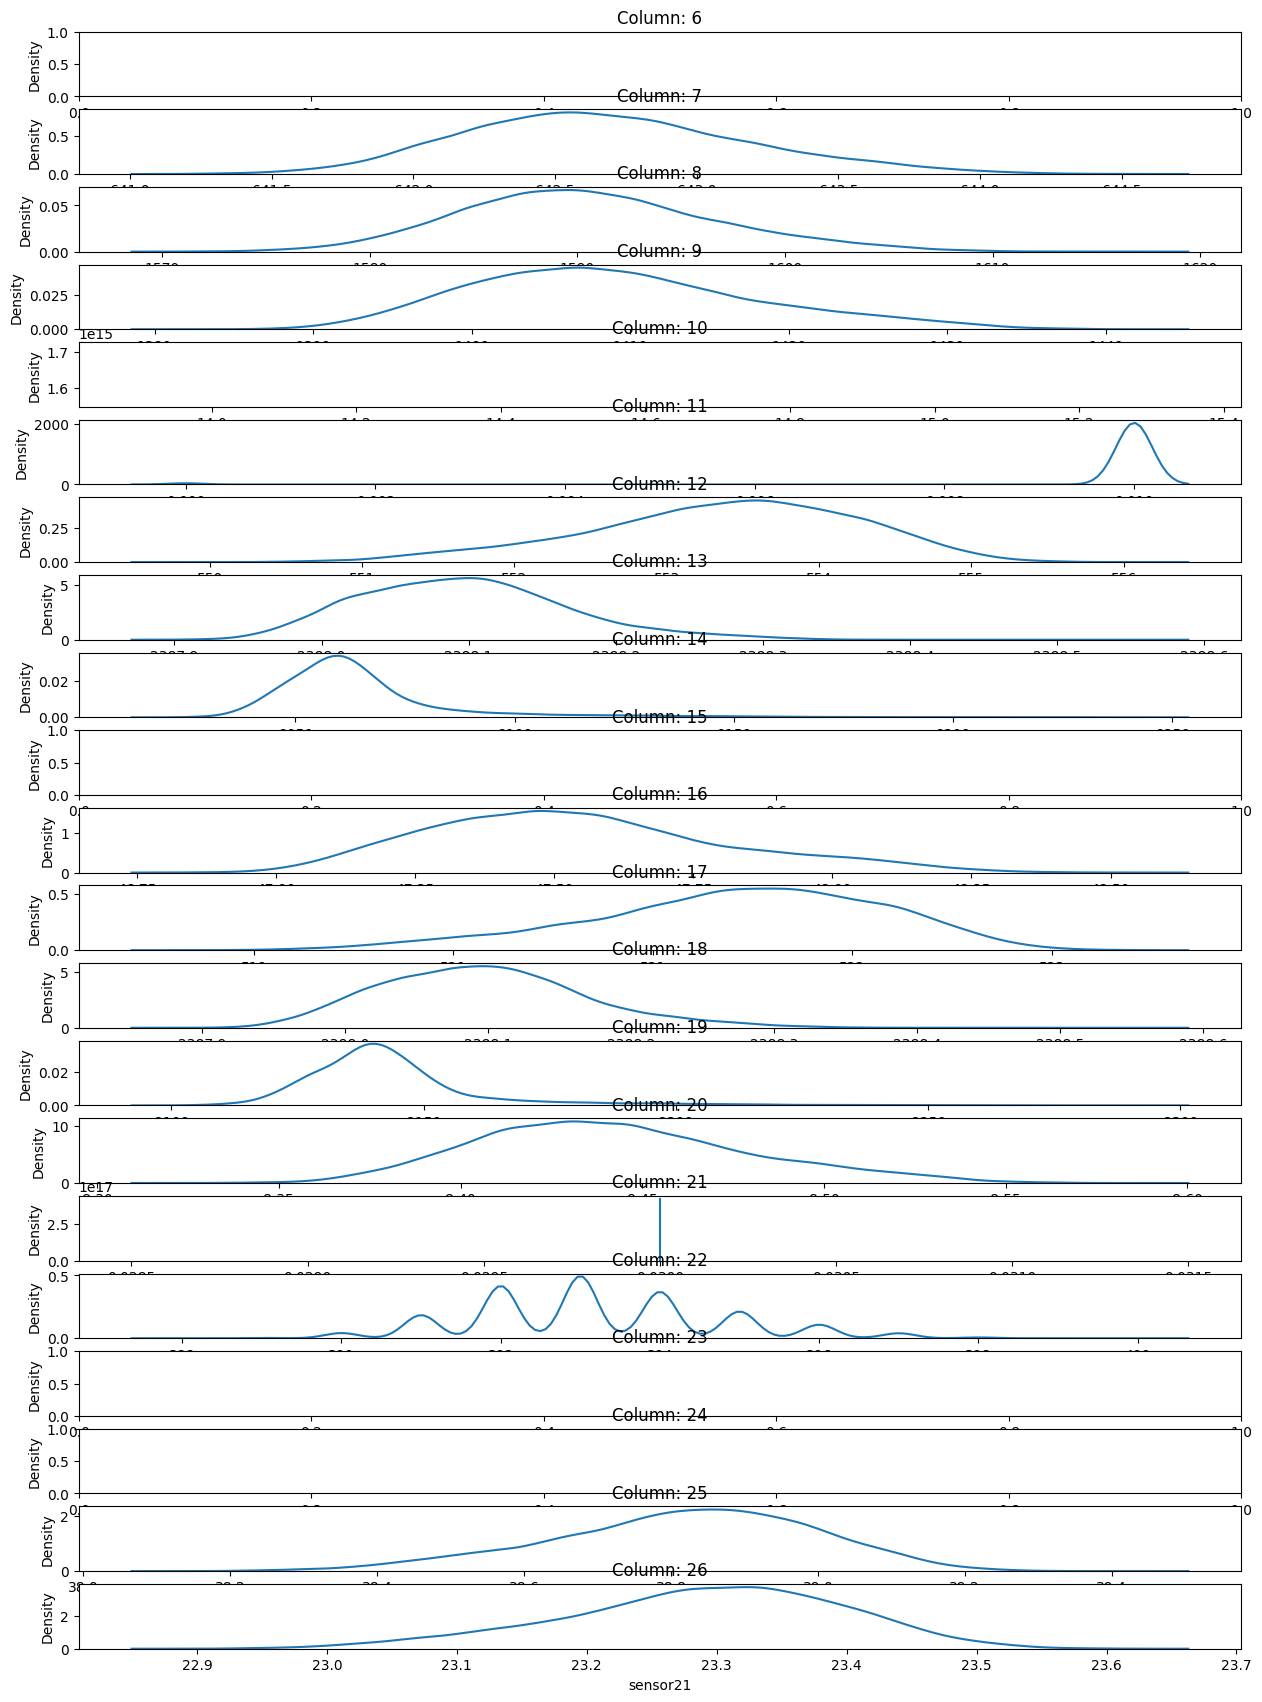

In [22]:
# KDE of Train dataset
plt.figure(figsize = (15, 21))
for i in np.arange(5,26):
    temp1 = train_FD001.iloc[:, i]
    plt.subplot(21,1, i-4)
    sns.kdeplot(temp1)
    plt.title("Column: "+ str(i+1))
plt.show()

C:\Users\pault\AppData\Local\Temp\ipykernel_27948\3428510721.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(temp1, legend = False, color="blue", label="Train")
C:\Users\pault\AppData\Local\Temp\ipykernel_27948\3428510721.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(temp2, legend = False, color ="red", label="Test")
C:\Users\pault\AppData\Local\Temp\ipykernel_27948\3428510721.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(temp1, legend = False, color="blue", label="Train")
C:\Users\pault\AppData\Local\Temp\ipykernel_27948\3428510721.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(temp1, legend = False, color="blue", label="Train")
C:\Us

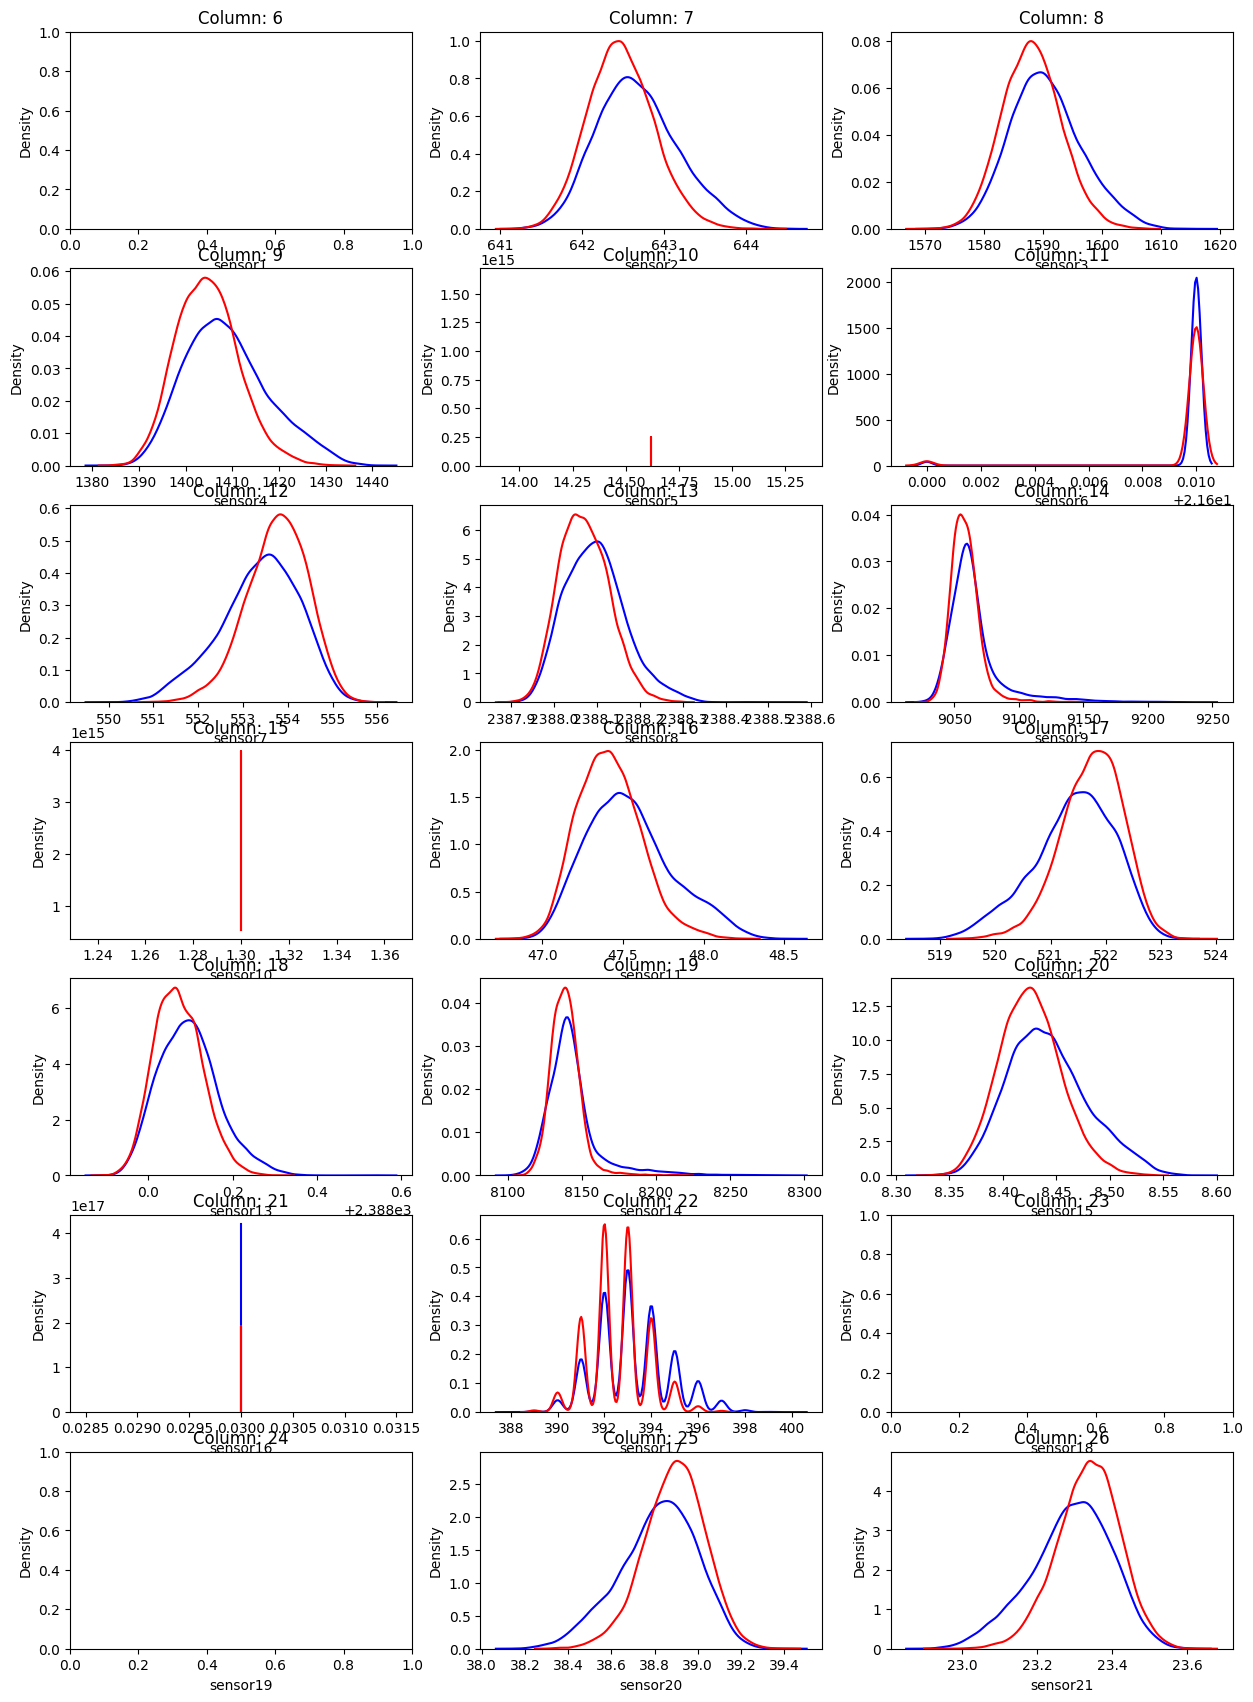

In [15]:
# KDE of Train and Test dataset

plt.figure(figsize = (15, 21))
for i in np.arange(5,26):
    temp1 = train_FD001.iloc[:, i]
    temp2 = test_FD001.iloc[:, i]
    plt.subplot(7,3, i-4)
    sns.kdeplot(temp1, legend = False, color="blue", label="Train")
    sns.kdeplot(temp2, legend = False, color ="red", label="Test")
    plt.title("Column: "+ str(i+1))
plt.show()

<Axes: >

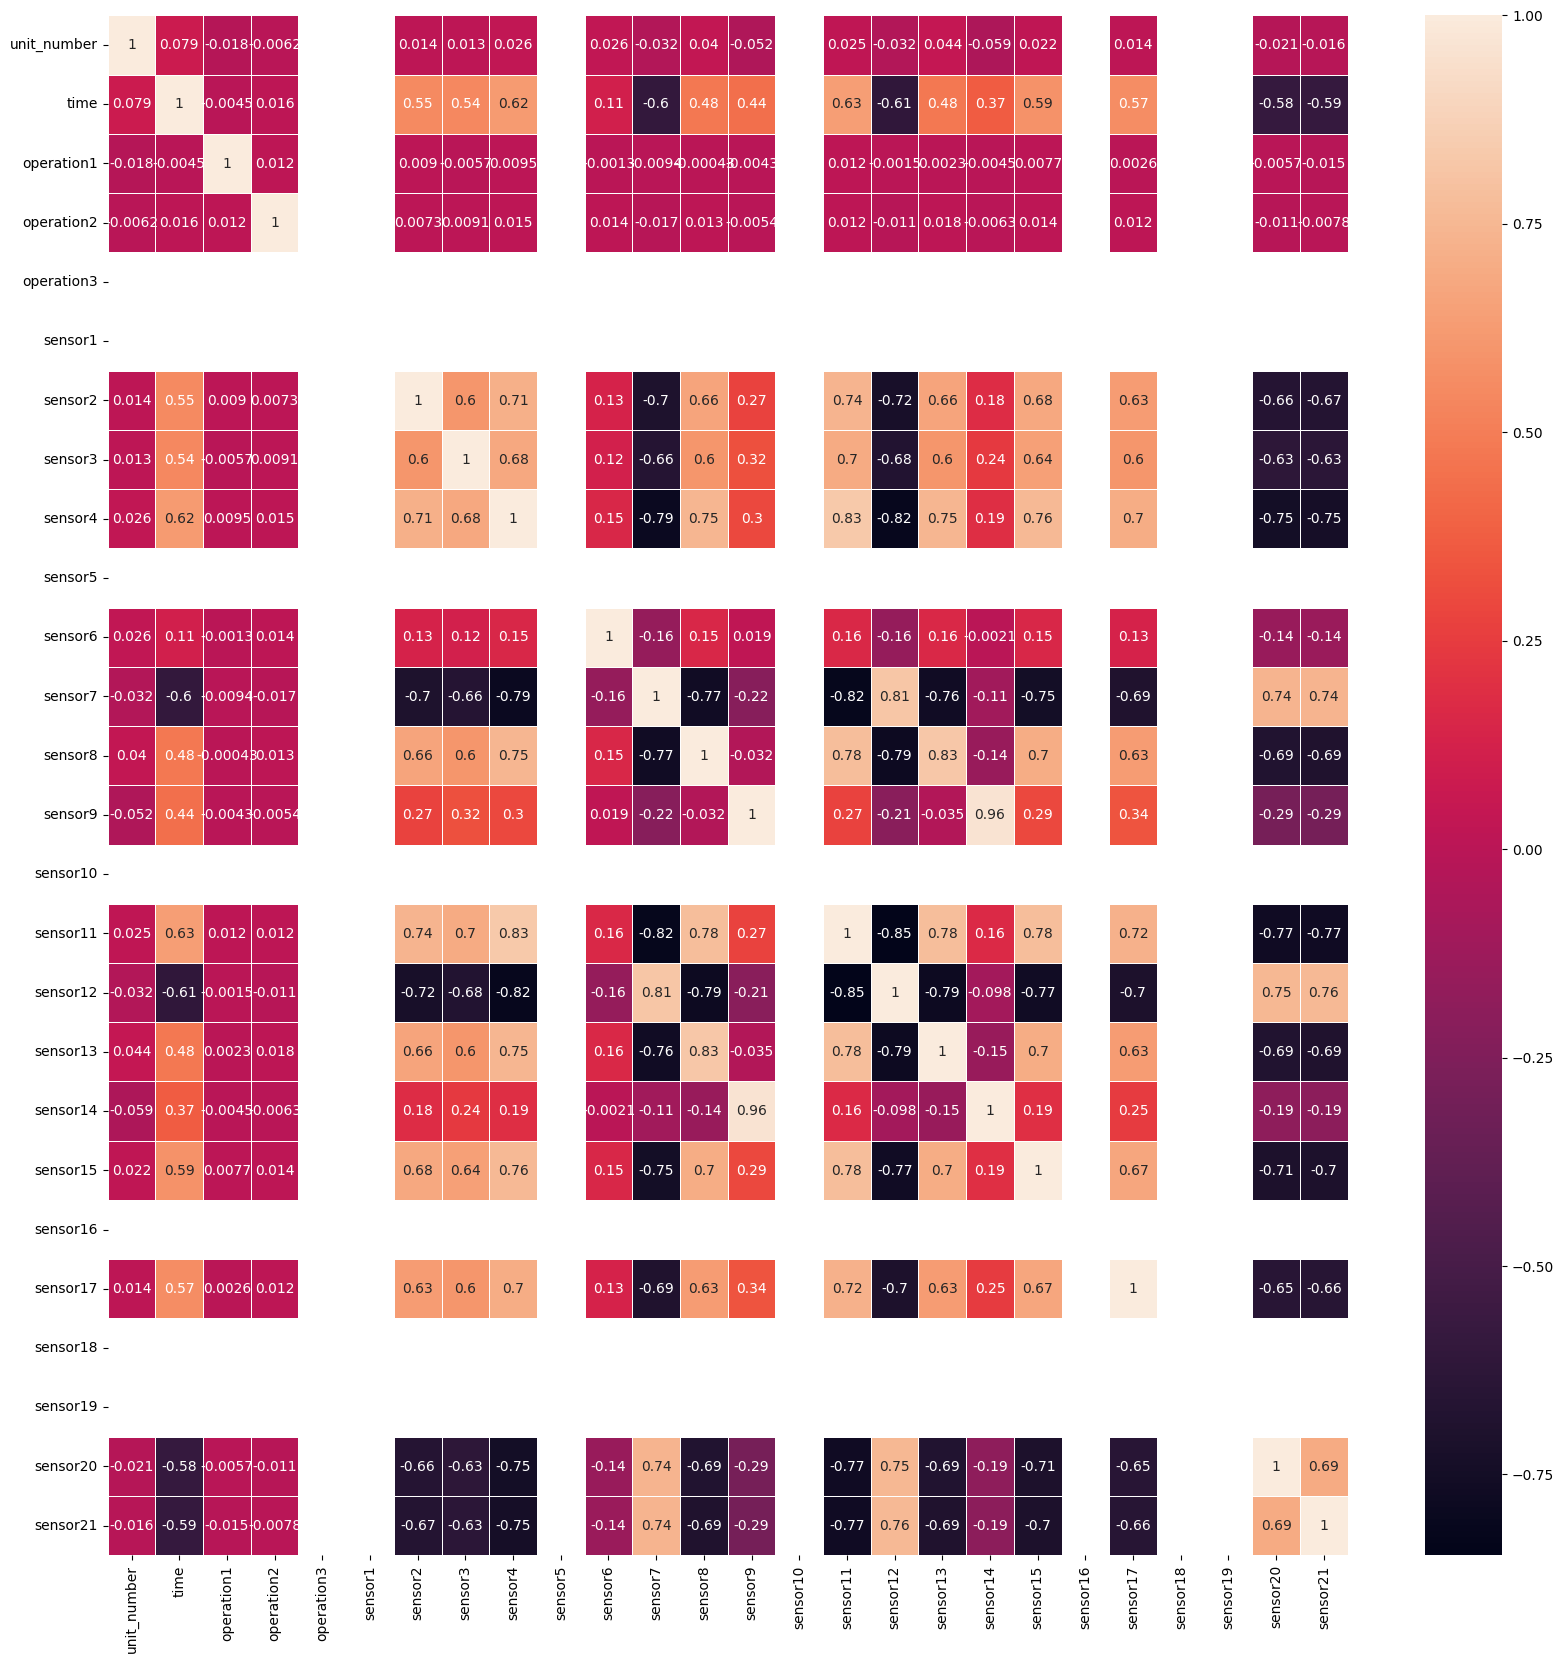

In [33]:
# correlation of sensor data
matrix = train_FD001.corr()

#plotting correlation matrix 
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(matrix, annot=True, linewidth=.5)